In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

plt.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [17]:
df_gu = pd.read_csv('df_gu_final.csv')
df_dong = pd.read_csv('df_dong_final.csv')

In [18]:
df_gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   자치구             25 non-null     object 
 1   단속건수            25 non-null     float64
 2   총 세대수           25 non-null     float64
 3   총 인구수           25 non-null     float64
 4   세대당인구           25 non-null     float64
 5   총 예산            25 non-null     float64
 6   주차장사업비          25 non-null     float64
 7   순이동             25 non-null     float64
 8   총상주인구(명)        25 non-null     float64
 9   총유입인구(명)        25 non-null     float64
 10  통근_유입인구(명)      25 non-null     float64
 11  통학_유입인구(명)      25 non-null     float64
 12  총유출인구(명)        25 non-null     float64
 13  통근_유출인구(명)      25 non-null     float64
 14  통학_유출인구(명)      25 non-null     float64
 15  총주간인구(명)        25 non-null     float64
 16  주간인구지수(%)       25 non-null     float64
 17  총상권개수           25 non-null     float

In [19]:
df_dong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   행정동                      20 non-null     object
 1   승차총승객수                   20 non-null     int64 
 2   하차총승객수                   20 non-null     int64 
 3   순이동                      20 non-null     int64 
 4   사업체수                     20 non-null     int64 
 5   종사자수                     20 non-null     int64 
 6   농업 임업 및 어업               20 non-null     int64 
 7   제조업                      20 non-null     int64 
 8   전기 가스 증기 및 공기조절 공급업      20 non-null     int64 
 9   수도 하수 및 폐기물 처리 원료 재생업    20 non-null     int64 
 10  건설업                      20 non-null     int64 
 11  도매 및 소매업                 20 non-null     int64 
 12  운수 및 창고업                 20 non-null     int64 
 13  숙박 및 음식점업                20 non-null     int64 
 14  정보통신업                    20 non-null     int

In [20]:
processed_data = df_gu.copy()

In [21]:
def kmeans(col1, col2):
    scaler = MinMaxScaler()
    processed_data[[col1, col2]] = scaler.fit_transform(processed_data[[col1, col2]])
    
    plt.figure(figsize = (8,10))
    for i in range(1, 7):
        # 클러스터 생성
        estimator = KMeans(n_clusters = i)
        ids = estimator.fit_predict(processed_data[[col1, col2]])
        # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)

        plt.subplot(3, 2, i)
        plt.tight_layout()
        # 서브플롯의 라벨링
        plt.title("K value = {}".format(i))
        plt.xlabel(col1)
        plt.ylabel(col2)
        # 클러스터링 그리기
        plt.scatter(processed_data[col1], processed_data[col2], c=ids)  
    plt.show()

In [22]:
def elbow(col1,col2):
    processed_data_t = processed_data[['자치구', col1, col2]]
    
    X = processed_data_t[[col1, col2]]
    Y = processed_data_t['자치구']


    distortions = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(X)
        distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

    # plot - 급격하게 줄어드는 부분
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [23]:
def show(col1, col2):
    processed_data_t = processed_data[['자치구', col1, col2]]

    # K = 3으로 클러스터링
    estimator = KMeans(n_clusters = 3)

    # 클러스터링 생성
    cluster_ids = estimator.fit_predict(processed_data_t[[col1, col2]])

    # create a scatter plot
    plt.scatter(processed_data_t[col1], processed_data_t[col2], c=cluster_ids)

    # 제품과 클러스터 id로 데이터에 범례 달기
    for index, gu, gun, people in processed_data_t.itertuples():
        plt.annotate("{}: {}".format(cluster_ids[index], gu),(gun, people))

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [24]:
df_dong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   행정동                      20 non-null     object
 1   승차총승객수                   20 non-null     int64 
 2   하차총승객수                   20 non-null     int64 
 3   순이동                      20 non-null     int64 
 4   사업체수                     20 non-null     int64 
 5   종사자수                     20 non-null     int64 
 6   농업 임업 및 어업               20 non-null     int64 
 7   제조업                      20 non-null     int64 
 8   전기 가스 증기 및 공기조절 공급업      20 non-null     int64 
 9   수도 하수 및 폐기물 처리 원료 재생업    20 non-null     int64 
 10  건설업                      20 non-null     int64 
 11  도매 및 소매업                 20 non-null     int64 
 12  운수 및 창고업                 20 non-null     int64 
 13  숙박 및 음식점업                20 non-null     int64 
 14  정보통신업                    20 non-null     int

## 필요한 변수만 설정(강한상관관계)

In [25]:
df_dong_t = df_dong[['행정동', '건축물부설 일반건축물 면수', '주차장 면수', 
                     '건축물부설 일반주택 면수', '특수', '화물', '승합', '종사자수']]

In [26]:
df_dong_t

,행정동,건축물부설 일반건축물 면수,주차장 면수,건축물부설 일반주택 면수,특수,화물,승합,종사자수
0,가양1동,36737,49535,179,31,2281,844,70656
1,가양2동,1836,5314,0,4,358,139,3352
2,가양3동,2423,5567,0,6,562,174,7941
3,공항동,17010,25818,2068,59,1644,561,34394
4,방화1동,3393,14206,854,40,1645,502,11304
5,방화2동,9235,15923,744,21,1017,742,16238
6,방화3동,1915,8603,222,19,669,273,4689
7,염창동,8126,20668,118,24,1296,316,16227
8,우장산동,3116,19795,789,37,992,281,7147
9,화곡8동,1265,8322,771,22,677,186,4385


In [27]:
df_x = df_dong_t.drop('행정동', axis = 1)
df_y = df_dong_t['행정동']

## 정규화

In [28]:
# 정규화
# from sklearn.preprocessing import StandardScaler 

# scaler = StandardScaler()            
# scaler.fit(df_x)                    
# df_s = scaler.transform(df_x)       
# df_s = pd.DataFrame(df_s, index = df_x.index, columns=df_x.columns) 
# df_s

## 차원 축소

In [29]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)      
pca.fit(df_x)             
df_p = pca.transform(df_x)
df_p = pd.DataFrame(df_p, columns = ['PC1','PC2']) 
df_p

,PC1,PC2
0,71889.101467,-1122.597911
1,-15870.422609,-3240.905064
2,-11960.318287,-5159.502654
3,24283.546039,-1857.982066
4,-4772.492682,809.794125
5,2271.535136,-1040.378049
6,-13212.347095,-951.608641
7,4095.422238,3285.983912
8,-5413.184793,7526.686495
9,-13852.566123,-908.984059


## 군집의 개수를 정하기 (centroid 개수)

In [30]:
from sklearn.cluster import KMeans             

sum_of_squared_distance = []                    
K = range(1,10)                                 
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_p)
    sum_of_squared_distance.append(km.inertia_)

## Elbow Method

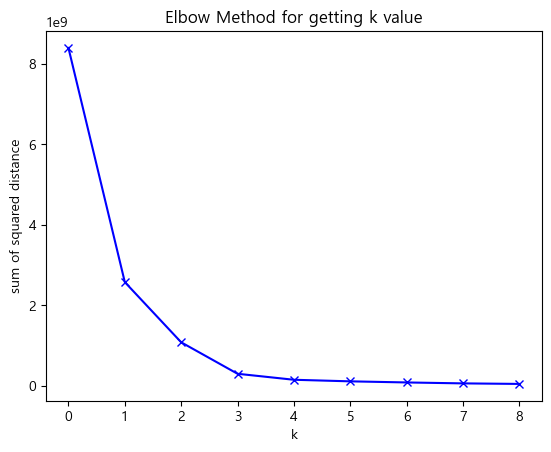

In [31]:
import matplotlib.pyplot as plt                 # 그래프를 그리기 matplotlib 라이브러리를 사용한다.

plt.plot(sum_of_squared_distance, '-bx')        # (default = line) plot을 그리고, 컬러를 blue, 포인터를 x로 놓는다. 
plt.xlabel('k')                                 # x축은 k로 지정
plt.ylabel('sum of squared distance')           # y축엔 거리제곱합의 이름
plt.title('Elbow Method for getting k value')   # 제목도 변경한다.
plt.show()                                      # 플롯을 그려본다

## 구한 k값으로 K-Means

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_p)
label = kmeans.labels_
label = pd.Series(label)
df_p['label'] = label.values
df_p

,PC1,PC2,label
0,71889.101467,-1122.597911,1
1,-15870.422609,-3240.905064,0
2,-11960.318287,-5159.502654,0
3,24283.546039,-1857.982066,3
4,-4772.492682,809.794125,2
5,2271.535136,-1040.378049,2
6,-13212.347095,-951.608641,0
7,4095.422238,3285.983912,2
8,-5413.184793,7526.686495,2
9,-13852.566123,-908.984059,0


## 시각화

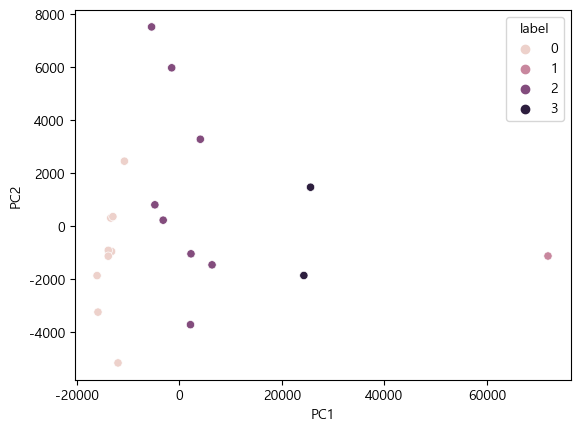

In [33]:
import seaborn as sns

sns.scatterplot(data = df_p, x = 'PC1',y = 'PC2', hue = 'label')
plt.show()

In [34]:
df_1 = df_p[df_p['label'] == 0].reset_index()
df_2 = df_p[df_p['label'] == 1].reset_index()
df_3 = df_p[df_p['label'] == 2].reset_index()
df_4 = df_p[df_p['label'] == 3].reset_index()
df_dong_t = df_dong_t.reset_index()

In [35]:
dong_0 = pd.merge(df_1, df_dong_t, how = 'inner', on = 'index')
dong_0 = dong_0.iloc[:,4:]


In [36]:
test0 = pd.merge(dong_0, df_dong[['행정동','단속건수']], how = 'inner', on = '행정동')
test0

,행정동,건축물부설 일반건축물 면수,주차장 면수,건축물부설 일반주택 면수,특수,화물,승합,종사자수,단속건수
0,가양2동,1836,5314,0,4,358,139,3352,13315
1,가양3동,2423,5567,0,6,562,174,7941,1801
2,방화3동,1915,8603,222,19,669,273,4689,2714
3,화곡8동,1265,8322,771,22,677,186,4385,3628
4,화곡본동,2699,12732,1021,14,949,323,4919,4098
5,등촌2동,1686,9611,758,11,619,169,3972,1888
6,화곡2동,1105,6412,595,13,604,210,2827,3829
7,화곡3동,1600,9879,683,19,555,153,4397,4245
8,화곡4동,1641,8090,1062,15,755,219,4315,5120


In [38]:
test0['단속건수'].median()

3829.0

In [40]:
(test0['주차장 면수'] / test0['종사자수']).mean()

1.935186925442348

In [41]:
dong_1 = pd.merge(df_2, df_dong_t, how = 'inner', on = 'index')
dong_1 = dong_1.iloc[:,4:]
dong_1

,행정동,건축물부설 일반건축물 면수,주차장 면수,건축물부설 일반주택 면수,특수,화물,승합,종사자수
0,가양1동,36737,49535,179,31,2281,844,70656


In [42]:
test1 = pd.merge(dong_1, df_dong[['행정동','단속건수']], how = 'inner', on = '행정동')
test1['단속건수'].mean()

16889.0

In [43]:
test1

,행정동,건축물부설 일반건축물 면수,주차장 면수,건축물부설 일반주택 면수,특수,화물,승합,종사자수,단속건수
0,가양1동,36737,49535,179,31,2281,844,70656,16889


In [44]:
(test1['주차장 면수'] / test1['종사자수']).mean()

0.7010728034420289

In [45]:
dong_2 = pd.merge(df_3, df_dong_t, how = 'inner', on = 'index')
dong_2 = dong_2.iloc[:,4:]
dong_2

,행정동,건축물부설 일반건축물 면수,주차장 면수,건축물부설 일반주택 면수,특수,화물,승합,종사자수
0,방화1동,3393,14206,854,40,1645,502,11304
1,방화2동,9235,15923,744,21,1017,742,16238
2,염창동,8126,20668,118,24,1296,316,16227
3,우장산동,3116,19795,789,37,992,281,7147
4,등촌1동,8891,13600,236,23,876,292,17753
5,등촌3동,9503,17670,39,17,756,278,20336
6,화곡6동,5653,14487,753,11,772,235,12040
7,화곡1동,5208,20220,1328,39,2097,539,10810


In [47]:
test2 = pd.merge(dong_2, df_dong[['행정동','단속건수']], how = 'inner', on = '행정동')
test2['단속건수'].mean()

6618.125

In [48]:
(test2['주차장 면수'] / test2['종사자수']).mean()

1.3736746532210615

In [49]:
dong_3 = pd.merge(df_4, df_dong_t, how = 'inner', on = 'index')
dong_3 = dong_3.iloc[:,4:]
dong_3

,행정동,건축물부설 일반건축물 면수,주차장 면수,건축물부설 일반주택 면수,특수,화물,승합,종사자수
0,공항동,17010,25818,2068,59,1644,561,34394
1,발산1동,19047,29360,352,69,1686,578,32771


In [50]:
test3 = pd.merge(dong_3, df_dong[['행정동','단속건수']], how = 'inner', on = '행정동')
test3['단속건수'].median()

31112.0

In [51]:
test3

,행정동,건축물부설 일반건축물 면수,주차장 면수,건축물부설 일반주택 면수,특수,화물,승합,종사자수,단속건수
0,공항동,17010,25818,2068,59,1644,561,34394,41748
1,발산1동,19047,29360,352,69,1686,578,32771,20476


In [52]:
(test3['주차장 면수'] / test3['종사자수']).mean()

0.8232841271181861

In [81]:
test0['단속건수'].mean()

4515.333333333333

In [54]:
test1['단속건수'].mean()

16889.0

In [55]:
test2['단속건수'].mean()

6618.125

In [56]:
test3['단속건수'].mean()

31112.0

In [57]:
# 종사자수 대비 주차장면수

In [58]:
# 단속 건수 1,3 클러스터이 높았고,  0,2 클러스터가 적었다 (상대적으로)

In [63]:
(test0['주차장 면수'] / test0['종사자수']).mean() 

1.935186925442348

In [64]:
(test1['주차장 면수'] / test1['종사자수']).mean()

0.7010728034420289

In [65]:
(test2['주차장 면수'] / test2['종사자수']).mean()

1.3736746532210615

In [66]:
(test3['주차장 면수'] / test3['종사자수']).mean()

0.8232841271181861

## -----------------------------------------------------------------------------------------------------

In [82]:
test0['특수'].mean()

13.666666666666666

In [68]:
test1['특수'].mean()

31.0

In [69]:
test2['특수'].mean()

26.5

In [70]:
test3['특수'].mean()

64.0

In [77]:
test0['화물'].mean()

638.6666666666666

In [72]:
test1['화물'].mean()

2281.0

In [73]:
test2['화물'].mean()

1181.375

In [74]:
test3['화물'].mean()

1665.0

In [78]:
test0['승합'].mean()

205.11111111111111

In [76]:
test1['승합'].mean()

844.0

In [79]:
test2['승합'].mean()

398.125

In [80]:
test3['승합'].mean()

569.5

### 종사자수 대비 주차장면수
- cluster = 0 -> 1.7355903517815015 
- cluster = 1 -> 1.1723528470026265
- cluster = 2 -> 1.3192779560565295
- cluster = 3 -> 0.7010728034420289